In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import numpy as np

In [2]:
data=pd.read_csv(r"C:\Users\mahar\WATER QUALITY\water_dataX.csv",encoding='ISO-8859-1',low_memory=False)

In [3]:
data.head()

,STATION CODE,LOCATIONS,STATE,Temp,D.O. (mg/l),PH,CONDUCTIVITY (µmhos/cm),B.O.D. (mg/l),NITRATENAN N+ NITRITENANN (mg/l),FECAL COLIFORM (MPN/100ml),TOTAL COLIFORM (MPN/100ml)Mean,year
0,1393,"DAMANGANGA AT D/S OF MADHUBAN, DAMAN",DAMAN & DIU,30.6,6.7,7.5,203,NAN,0.1,11,27,2014
1,1399,ZUARI AT D/S OF PT. WHERE KUMBARJRIA CANAL JOI...,GOA,29.8,5.7,7.2,189,2,0.2,4953,8391,2014
2,1475,ZUARI AT PANCHAWADI,GOA,29.5,6.3,6.9,179,1.7,0.1,3243,5330,2014
3,3181,RIVER ZUARI AT BORIM BRIDGE,GOA,29.7,5.8,6.9,64,3.8,0.5,5382,8443,2014
4,3182,RIVER ZUARI AT MARCAIM JETTY,GOA,29.5,5.8,7.3,83,1.9,0.4,3428,5500,2014


In [4]:
data.tail() #Bottom 5 rows

,STATION CODE,LOCATIONS,STATE,Temp,D.O. (mg/l),PH,CONDUCTIVITY (µmhos/cm),B.O.D. (mg/l),NITRATENAN N+ NITRITENANN (mg/l),FECAL COLIFORM (MPN/100ml),TOTAL COLIFORM (MPN/100ml)Mean,year
1986,1330,"TAMBIRAPARANI AT ARUMUGANERI, TAMILNADU",NAN,NAN,7.9,738,7.2,2.7,0.518,0.518,202,2003
1987,1450,"PALAR AT VANIYAMBADI WATER SUPPLY HEAD WORK, T...",NAN,29,7.5,585,6.3,2.6,0.155,0.155,315,2003
1988,1403,"GUMTI AT U/S SOUTH TRIPURA,TRIPURA",NAN,28,7.6,98,6.2,1.2,NAN,NAN,570,2003
1989,1404,"GUMTI AT D/S SOUTH TRIPURA, TRIPURA",NAN,28,7.7,91,6.5,1.3,NAN,NAN,562,2003
1990,1726,"CHANDRAPUR, AGARTALA D/S OF HAORA RIVER, TRIPURA",NAN,29,7.6,110,5.7,1.1,NAN,NAN,546,2003


In [5]:
data.describe() #shows the descriptive statistics

,year
count,1991.000000
mean,2010.038172
std,3.057333
min,2003.000000
25%,2008.000000
50%,2011.000000
75%,2013.000000
max,2014.000000


In [6]:
data.info() #shows small information about data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1991 entries, 0 to 1990
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   STATION CODE                      1991 non-null   object
 1   LOCATIONS                         1991 non-null   object
 2   STATE                             1991 non-null   object
 3   Temp                              1991 non-null   object
 4   D.O. (mg/l)                       1991 non-null   object
 5   PH                                1991 non-null   object
 6   CONDUCTIVITY (µmhos/cm)           1991 non-null   object
 7   B.O.D. (mg/l)                     1991 non-null   object
 8   NITRATENAN N+ NITRITENANN (mg/l)  1991 non-null   object
 9   FECAL COLIFORM (MPN/100ml)        1991 non-null   object
 10  TOTAL COLIFORM (MPN/100ml)Mean    1991 non-null   object
 11  year                              1991 non-null   int64 
dtypes: int64(1), object(

In [7]:
data.isnull().any()

STATION CODE                        False
LOCATIONS                           False
STATE                               False
Temp                                False
D.O. (mg/l)                         False
PH                                  False
CONDUCTIVITY (µmhos/cm)             False
B.O.D. (mg/l)                       False
NITRATENAN N+ NITRITENANN (mg/l)    False
FECAL COLIFORM (MPN/100ml)          False
TOTAL COLIFORM (MPN/100ml)Mean      False
year                                False
dtype: bool

In [8]:
#Let us convert object datatype to float for calculation of water quality index
data['Temp']=pd.to_numeric(data['Temp'],errors='coerce')
data['D.O. (mg/l)']=pd.to_numeric(data['D.O. (mg/l)'],errors='coerce')
data['PH']=pd.to_numeric(data['PH'],errors='coerce')
data['B.O.D. (mg/l)']=pd.to_numeric(data['B.O.D. (mg/l)'],errors='coerce')
data['CONDUCTIVITY (µmhos/cm)']=pd.to_numeric(data['CONDUCTIVITY (µmhos/cm)'],errors='coerce')
data['NITRATENAN N+ NITRITENANN (mg/l)']=pd.to_numeric(data['NITRATENAN N+ NITRITENANN (mg/l)'],errors='coerce')
data['TOTAL COLIFORM (MPN/100ml)Mean']=pd.to_numeric(data['TOTAL COLIFORM (MPN/100ml)Mean'],errors='coerce')
data.dtypes

STATION CODE                         object
LOCATIONS                            object
STATE                                object
Temp                                float64
D.O. (mg/l)                         float64
PH                                  float64
CONDUCTIVITY (µmhos/cm)             float64
B.O.D. (mg/l)                       float64
NITRATENAN N+ NITRITENANN (mg/l)    float64
FECAL COLIFORM (MPN/100ml)           object
TOTAL COLIFORM (MPN/100ml)Mean      float64
year                                  int64
dtype: object

In [9]:
data.isnull().sum()

STATION CODE                          0
LOCATIONS                             0
STATE                                 0
Temp                                 92
D.O. (mg/l)                          31
PH                                    8
CONDUCTIVITY (µmhos/cm)              25
B.O.D. (mg/l)                        43
NITRATENAN N+ NITRITENANN (mg/l)    225
FECAL COLIFORM (MPN/100ml)            0
TOTAL COLIFORM (MPN/100ml)Mean      132
year                                  0
dtype: int64

In [10]:
data['Temp'].fillna(data['Temp'].mean(),inplace=True)
data['D.O. (mg/l)'].fillna(data['D.O. (mg/l)'].mean(),inplace=True)
data['PH'].fillna(data['PH'].mean(),inplace=True)
data['CONDUCTIVITY (µmhos/cm)'].fillna(data['CONDUCTIVITY (µmhos/cm)'].mean(),inplace=True)
data['B.O.D. (mg/l)'].fillna(data['B.O.D. (mg/l)'].mean(),inplace=True)
data['NITRATENAN N+ NITRITENANN (mg/l)'].fillna(data['NITRATENAN N+ NITRITENANN (mg/l)'].mean(),inplace=True)
data['TOTAL COLIFORM (MPN/100ml)Mean'].fillna(data['TOTAL COLIFORM (MPN/100ml)Mean'].mean(),inplace=True)

In [11]:
data.isnull().sum()

STATION CODE                        0
LOCATIONS                           0
STATE                               0
Temp                                0
D.O. (mg/l)                         0
PH                                  0
CONDUCTIVITY (µmhos/cm)             0
B.O.D. (mg/l)                       0
NITRATENAN N+ NITRITENANN (mg/l)    0
FECAL COLIFORM (MPN/100ml)          0
TOTAL COLIFORM (MPN/100ml)Mean      0
year                                0
dtype: int64

In [12]:
data.head()

,STATION CODE,LOCATIONS,STATE,Temp,D.O. (mg/l),PH,CONDUCTIVITY (µmhos/cm),B.O.D. (mg/l),NITRATENAN N+ NITRITENANN (mg/l),FECAL COLIFORM (MPN/100ml),TOTAL COLIFORM (MPN/100ml)Mean,year
0,1393,"DAMANGANGA AT D/S OF MADHUBAN, DAMAN",DAMAN & DIU,30.6,6.7,7.5,203.0,6.940049,0.1,11,27.0,2014
1,1399,ZUARI AT D/S OF PT. WHERE KUMBARJRIA CANAL JOI...,GOA,29.8,5.7,7.2,189.0,2.000000,0.2,4953,8391.0,2014
2,1475,ZUARI AT PANCHAWADI,GOA,29.5,6.3,6.9,179.0,1.700000,0.1,3243,5330.0,2014
3,3181,RIVER ZUARI AT BORIM BRIDGE,GOA,29.7,5.8,6.9,64.0,3.800000,0.5,5382,8443.0,2014
4,3182,RIVER ZUARI AT MARCAIM JETTY,GOA,29.5,5.8,7.3,83.0,1.900000,0.4,3428,5500.0,2014


In [13]:
#Let us drop FECAL COLIFORM (MPN/100ml) as we already have
data.drop(["FECAL COLIFORM (MPN/100ml)"],axis=1,inplace=True)

In [14]:
#Let us rename the columns for simplification
data=data.rename(columns = {'D.O. (mg/l)': 'do'})
data=data.rename(columns = {'CONDUCTIVITY (µmhos/cm)': 'co'})
data=data.rename(columns = {'B.O.D. (mg/l)': 'bod'})
data=data.rename(columns = {'NITRATENAN N+ NITRITENANN (mg/l)':'na' })
data=data.rename(columns = {'TOTAL COLIFORM (MPN/100ml)Mean': 'tc'})
data=data.rename(columns = {'STATION CODE': 'station'})
data=data.rename(columns = {'LOCATIONS': 'location' })
data=data.rename(columns = {'STATE': 'state'})
data=data.rename(columns = {'PH':'ph'})

In [15]:
data.head()

,station,location,state,Temp,do,ph,co,bod,na,tc,year
0,1393,"DAMANGANGA AT D/S OF MADHUBAN, DAMAN",DAMAN & DIU,30.6,6.7,7.5,203.0,6.940049,0.1,27.0,2014
1,1399,ZUARI AT D/S OF PT. WHERE KUMBARJRIA CANAL JOI...,GOA,29.8,5.7,7.2,189.0,2.000000,0.2,8391.0,2014
2,1475,ZUARI AT PANCHAWADI,GOA,29.5,6.3,6.9,179.0,1.700000,0.1,5330.0,2014
3,3181,RIVER ZUARI AT BORIM BRIDGE,GOA,29.7,5.8,6.9,64.0,3.800000,0.5,8443.0,2014
4,3182,RIVER ZUARI AT MARCAIM JETTY,GOA,29.5,5.8,7.3,83.0,1.900000,0.4,5500.0,2014


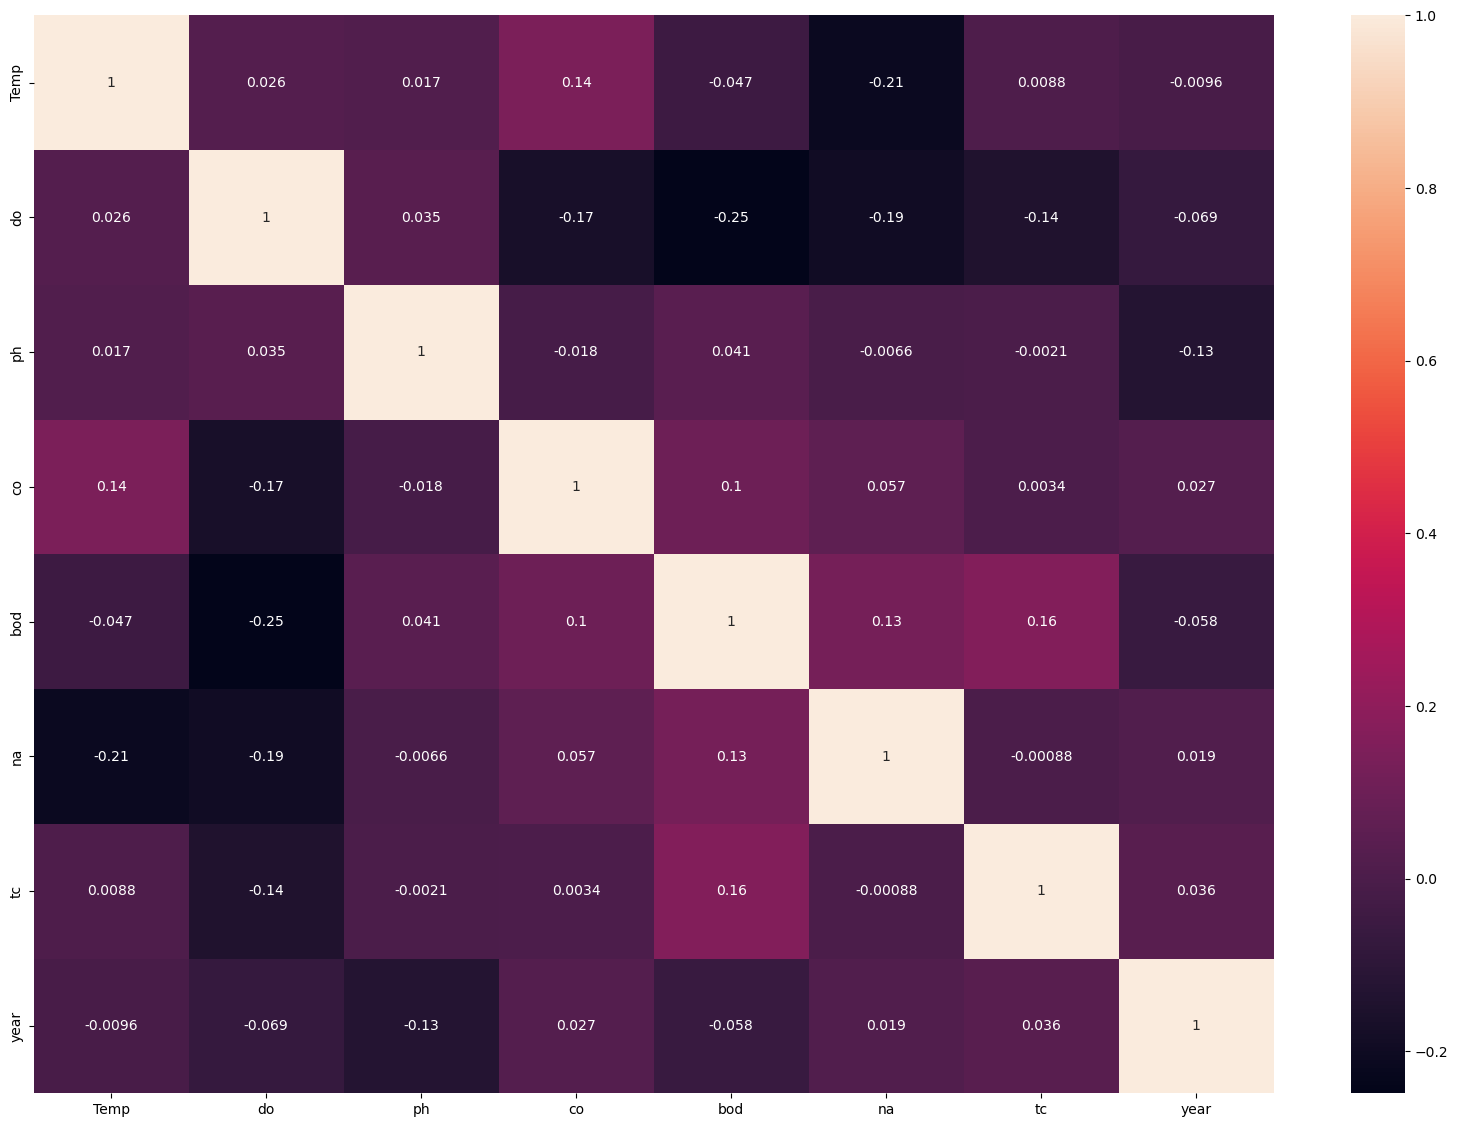

In [16]:
axis = plt.subplots(figsize=(20,14))
sns.heatmap(data.corr(),annot = True)
plt.show()

In [17]:
#calculation of ph
data['npH']=data.do.apply(lambda x:(100 if(8.5>=x>=7)
                                   else(80 if (8.6>=x>=8.5) or (6.9>=x>=6.8)
                                       else(60 if (8.8>=x>=8.6) or (6.8>=x>=6.7)
                                           else(40 if (9>=x>=8.8) or (6.7>=x>=6.5)
                                               else 0)))))

In [18]:
#calculation of dissolved oxygen
data['ndo']=data.do.apply(lambda x:(100 if(x>6)
                                   else(80 if (6>=x>=5.1)
                                       else(60 if (5>=x>=4.1)
                                           else(40 if (4>=x>=3)
                                               else 0)))))

In [19]:
#calculation of total coliform
data['nco']=data.tc.apply(lambda x:(100 if(5>=x>=0)
                                   else(80 if (50>=x>=5)
                                       else(60 if (500>=x>=50)
                                           else(40 if (10000>=x>=500)
                                               else 0)))))

In [20]:
#calculation of B.D.O
data['nbdo']=data.bod.apply(lambda x:(100 if(3>=x>=0)
                                   else(80 if (6>=x>=3)
                                       else(60 if (80>=x>=6)
                                           else(40 if (125>=x>=80)
                                               else 0)))))

In [21]:
#calculation of electrical conductivity
data['nec']=data.co.apply(lambda x:(100 if(75>=x>=0)
                                   else(80 if (150>=x>=75)
                                       else(60 if (225>=x>=150)
                                           else(40 if (300>=x>=225)
                                               else 0)))))

In [22]:
#calculation of nitrate
data['nna']=data.na.apply(lambda x:(100 if(20>=x>=0)
                                   else(80 if (50>=x>=20)
                                       else(60 if (100>=x>=50)
                                           else(40 if (200>=x>=100)
                                               else 0)))))

In [23]:
data.head()
data.dtypes

station      object
location     object
state        object
Temp        float64
do          float64
ph          float64
co          float64
bod         float64
na          float64
tc          float64
year          int64
npH           int64
ndo           int64
nco           int64
nbdo          int64
nec           int64
nna           int64
dtype: object

In [24]:
# Calculation water quality index WQI
data['wph']=data.npH * 0.165
data['wdo']=data.ndo * 0.281
data['wbdo']=data.nbdo * 0.234
data['wec']=data.nec* 0.009
data['wna']=data.nna * 0.028
data['wco']=data.nco * 0.281
data['wqi']=data.wph+data.wdo+data.wbdo+data.wec+data.wna+data.wco 
data

,station,location,state,Temp,do,ph,co,bod,na,tc,...,nbdo,nec,nna,wph,wdo,wbdo,wec,wna,wco,wqi
0,1393,"DAMANGANGA AT D/S OF MADHUBAN, DAMAN",DAMAN & DIU,30.600000,6.7,7.5,203.0,6.940049,0.100000,27.0,...,60,60,100,9.9,28.10,14.04,0.54,2.8,22.48,77.86
1,1399,ZUARI AT D/S OF PT. WHERE KUMBARJRIA CANAL JOI...,GOA,29.800000,5.7,7.2,189.0,2.000000,0.200000,8391.0,...,100,60,100,0.0,22.48,23.40,0.54,2.8,11.24,60.46
2,1475,ZUARI AT PANCHAWADI,GOA,29.500000,6.3,6.9,179.0,1.700000,0.100000,5330.0,...,100,60,100,0.0,28.10,23.40,0.54,2.8,11.24,66.08
3,3181,RIVER ZUARI AT BORIM BRIDGE,GOA,29.700000,5.8,6.9,64.0,3.800000,0.500000,8443.0,...,80,100,100,0.0,22.48,18.72,0.90,2.8,11.24,56.14
4,3182,RIVER ZUARI AT MARCAIM JETTY,GOA,29.500000,5.8,7.3,83.0,1.900000,0.400000,5500.0,...,100,80,100,0.0,22.48,23.40,0.72,2.8,11.24,60.64
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1986,1330,"TAMBIRAPARANI AT ARUMUGANERI, TAMILNADU",NAN,26.209814,7.9,738.0,7.2,2.700000,0.518000,202.0,...,100,100,100,16.5,28.10,23.40,0.90,2.8,16.86,88.56
1987,1450,"PALAR AT VANIYAMBADI WATER SUPPLY HEAD WORK, T...",NAN,29.000000,7.5,585.0,6.3,2.600000,0.155000,315.0,...,100,100,100,16.5,28.10,23.40,0.90,2.8,16.86,88.56
1988,1403,"GUMTI AT U/S SOUTH TRIPURA,TRIPURA",NAN,28.000000,7.6,98.0,6.2,1.200000,1.623079,570.0,...,100,100,100,16.5,28.10,23.40,0.90,2.8,11.24,82.94
1989,1404,"GUMTI AT D/S SOUTH TRIPURA, TRIPURA",NAN,28.000000,7.7,91.0,6.5,1.300000,1.623079,562.0,...,100,100,100,16.5,28.10,23.40,0.90,2.8,11.24,82.94


In [25]:
#calculation overall wqi for each year
average=data.groupby('year')['wqi'].mean()

In [26]:
average.head()

year
2003    81.089545
2004    77.790000
2005    69.286723
2006    65.995429
2007    67.668667
Name: wqi, dtype: float64

In [27]:
data1=average.reset_index(level=0,inplace=False)
data1

,year,wqi
0,2003,81.089545
1,2004,77.790000
2,2005,69.286723
3,2006,65.995429
4,2007,67.668667
5,2008,67.962516
6,2009,69.130939
7,2010,70.397553
8,2011,69.123290
9,2012,72.894247


<AxesSubplot:>

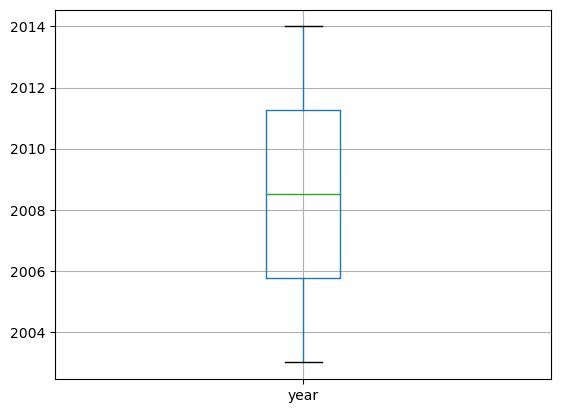

In [28]:
#Data Visualization
data1.boxplot(column='year')

C:\Users\mahar\AppData\Local\Temp\ipykernel_18404\76913748.py:10: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


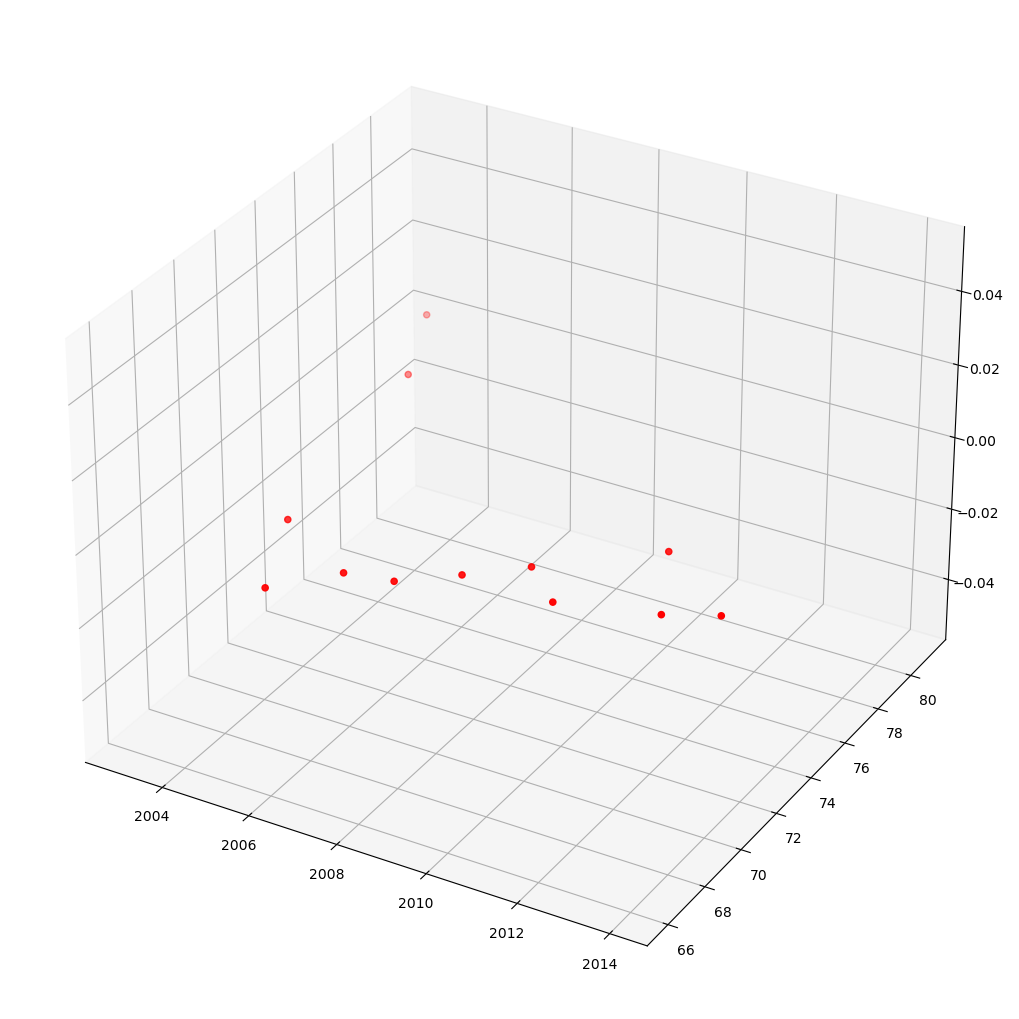

,year,wqi
0,2003,81.089545
1,2004,77.790000
2,2005,69.286723
3,2006,65.995429
4,2007,67.668667
5,2008,67.962516
6,2009,69.130939
7,2010,70.397553
8,2011,69.123290
9,2012,72.894247


In [29]:
#visualizing the filttered data
year=data1['year'].values
AQI=data1['wqi'].values
data1['wqi']=pd.to_numeric(data1['wqi'])
data1['year']=pd.to_numeric(data1['year'])
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (20.0, 10.0)
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(year,AQI, color='red')
plt.show()
data1

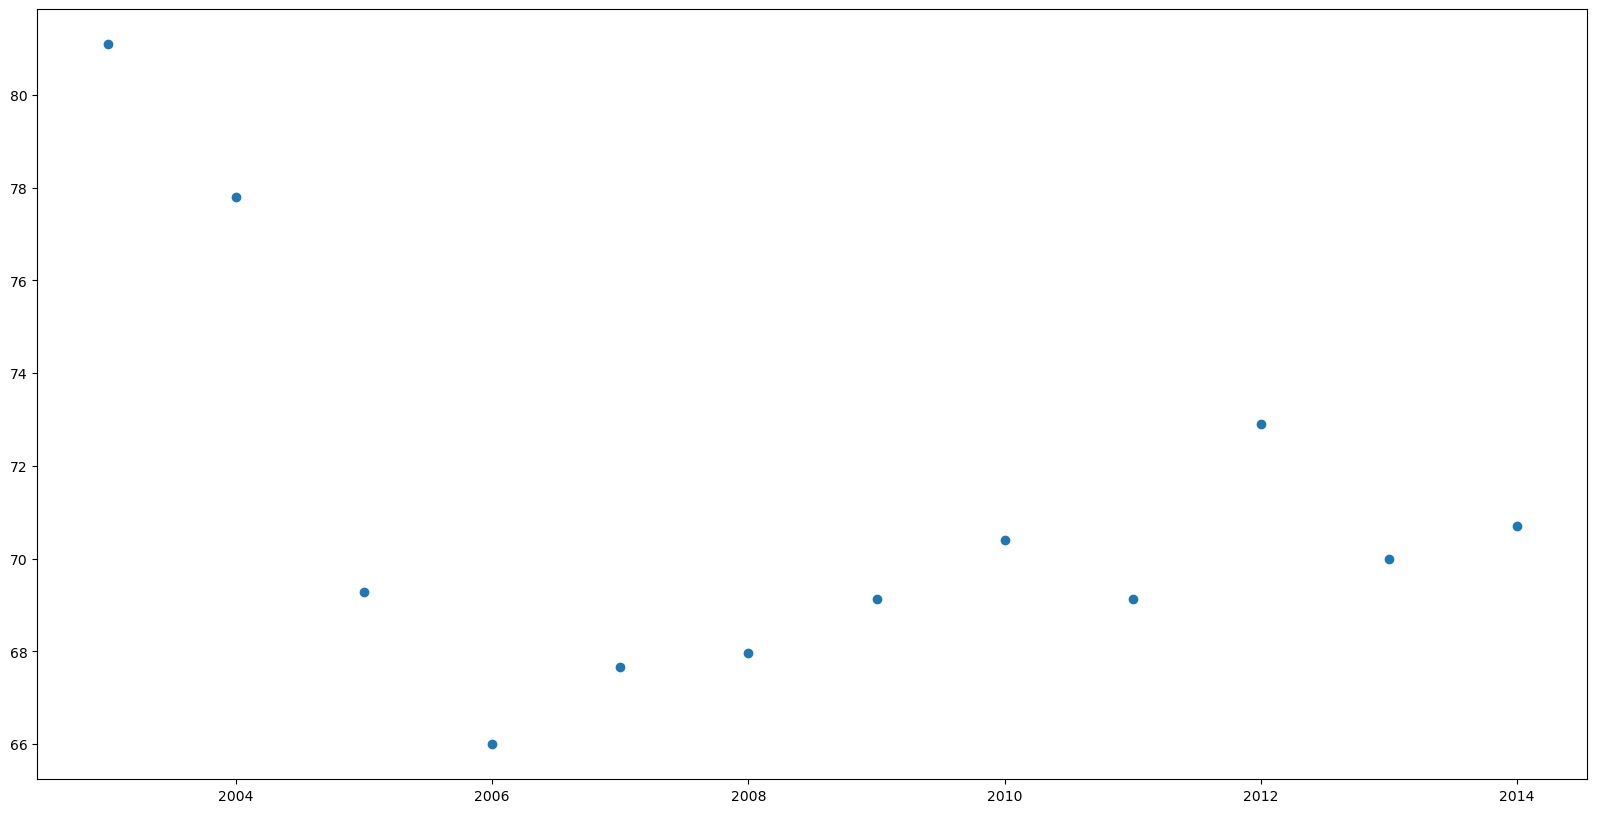

In [30]:
#scatter plot of data points
cols =['year']
y = data1['wqi']
x=data1[cols]

plt.scatter(x,y)
plt.show()

In [31]:
data.head(20)

,station,location,state,Temp,do,ph,co,bod,na,tc,...,nbdo,nec,nna,wph,wdo,wbdo,wec,wna,wco,wqi
0,1393,"DAMANGANGA AT D/S OF MADHUBAN, DAMAN",DAMAN & DIU,30.6,6.7,7.5,203.0,6.940049,0.1,27.0,...,60,60,100,9.9,28.10,14.04,0.54,2.8,22.48,77.86
1,1399,ZUARI AT D/S OF PT. WHERE KUMBARJRIA CANAL JOI...,GOA,29.8,5.7,7.2,189.0,2.000000,0.2,8391.0,...,100,60,100,0.0,22.48,23.40,0.54,2.8,11.24,60.46
2,1475,ZUARI AT PANCHAWADI,GOA,29.5,6.3,6.9,179.0,1.700000,0.1,5330.0,...,100,60,100,0.0,28.10,23.40,0.54,2.8,11.24,66.08
3,3181,RIVER ZUARI AT BORIM BRIDGE,GOA,29.7,5.8,6.9,64.0,3.800000,0.5,8443.0,...,80,100,100,0.0,22.48,18.72,0.90,2.8,11.24,56.14
4,3182,RIVER ZUARI AT MARCAIM JETTY,GOA,29.5,5.8,7.3,83.0,1.900000,0.4,5500.0,...,100,80,100,0.0,22.48,23.40,0.72,2.8,11.24,60.64
5,1400,"MANDOVI AT NEGHBOURHOOD OF PANAJI, GOA",GOA,30.0,5.5,7.4,81.0,1.500000,0.1,4049.0,...,100,80,100,0.0,22.48,23.40,0.72,2.8,11.24,60.64
6,1476,"MANDOVI AT TONCA, MARCELA, GOA",GOA,29.2,6.1,6.7,308.0,1.400000,0.3,5672.0,...,100,0,100,0.0,28.10,23.40,0.00,2.8,11.24,65.54
7,3185,RIVER MANDOVI AT AMONA BRIDGE,GOA,29.6,6.4,6.7,414.0,1.000000,0.2,9423.0,...,100,0,100,0.0,28.10,23.40,0.00,2.8,11.24,65.54
8,3186,RIVER MANDOVI AT IFFI JETTY,GOA,30.0,6.4,7.6,305.0,2.200000,0.1,4990.0,...,100,0,100,0.0,28.10,23.40,0.00,2.8,11.24,65.54
9,3187,RIVER MANDOVI NEAR HOTEL MARRIOT,GOA,30.1,6.3,7.6,77.0,2.300000,0.1,4301.0,...,100,80,100,0.0,28.10,23.40,0.72,2.8,11.24,66.26


In [32]:
data.tail(20)

,station,location,state,Temp,do,ph,co,bod,na,tc,...,nbdo,nec,nna,wph,wdo,wbdo,wec,wna,wco,wqi
1971,1631,"MYNTDU RIVER JOWAI, MEGHALAYA",NAN,15.000000,6.9,142.0,7.3,2.2,1.623079,1573.00000,...,100,100,100,13.2,28.1,23.40,0.9,2.8,11.24,79.64
1972,1632,"GANOL RIVER TURA, MEGHALAYA",NAN,20.000000,6.9,145.0,7.8,1.8,1.623079,245.00000,...,100,100,100,13.2,28.1,23.40,0.9,2.8,16.86,85.26
1973,1633,"SIMSANG RIVER WILLIAMNAGAR, MEGHALAYA",NAN,21.000000,7.0,145.0,7.3,2.3,1.623079,363.00000,...,100,100,100,16.5,28.1,23.40,0.9,2.8,16.86,88.56
1974,1455,"RUSHIKULYA AT GANJAM U/S, ORISSA",NAN,30.000000,8.1,569.0,8.2,1.6,1.028000,6050.00000,...,100,100,100,16.5,28.1,23.40,0.9,2.8,11.24,82.94
1975,1456,"RUSHIKULYA AT GANJAM D/S, ORISSA",NAN,27.000000,7.7,28598.0,7.7,1.7,0.962000,3200.00000,...,100,100,100,16.5,28.1,23.40,0.9,2.8,11.24,82.94
1976,1642,"NAGAVALLI AT JAYKAYPUR D/S, ORISSA",NAN,30.000000,7.4,219.0,6.8,3.0,0.964000,11300.00000,...,100,100,100,16.5,28.1,23.40,0.9,2.8,0.00,71.70
1977,1643,"NAGAVALLI AT RAYAGADA D/S, ORISSA",NAN,29.000000,7.2,198.0,7.2,2.1,1.030000,4950.00000,...,100,100,100,16.5,28.1,23.40,0.9,2.8,11.24,82.94
1978,1685,"ARASALAR RIVER KARAIKAL REGION, PONDICHERRY",NAN,29.000000,8.0,978.0,5.4,9.0,1.240000,533687.16568,...,60,100,100,16.5,28.1,14.04,0.9,2.8,0.00,62.34
1979,1717,"KODRA DAM, MOUNT ABU, RAJASTHAN",NAN,21.000000,7.6,203.0,6.3,1.9,0.107000,109.00000,...,100,100,100,16.5,28.1,23.40,0.9,2.8,16.86,88.56
1980,1159,TAMBIRAPARANI AT BDG.NR. MADURA COATS LTD.PAPA...,NAN,29.000000,7.2,150.0,7.5,1.3,0.142000,327.00000,...,100,100,100,16.5,28.1,23.40,0.9,2.8,16.86,88.56


C:\Users\mahar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\mahar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\mahar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\mahar\anaconda3\lib\si

<AxesSubplot:xlabel='wqi', ylabel='count'>

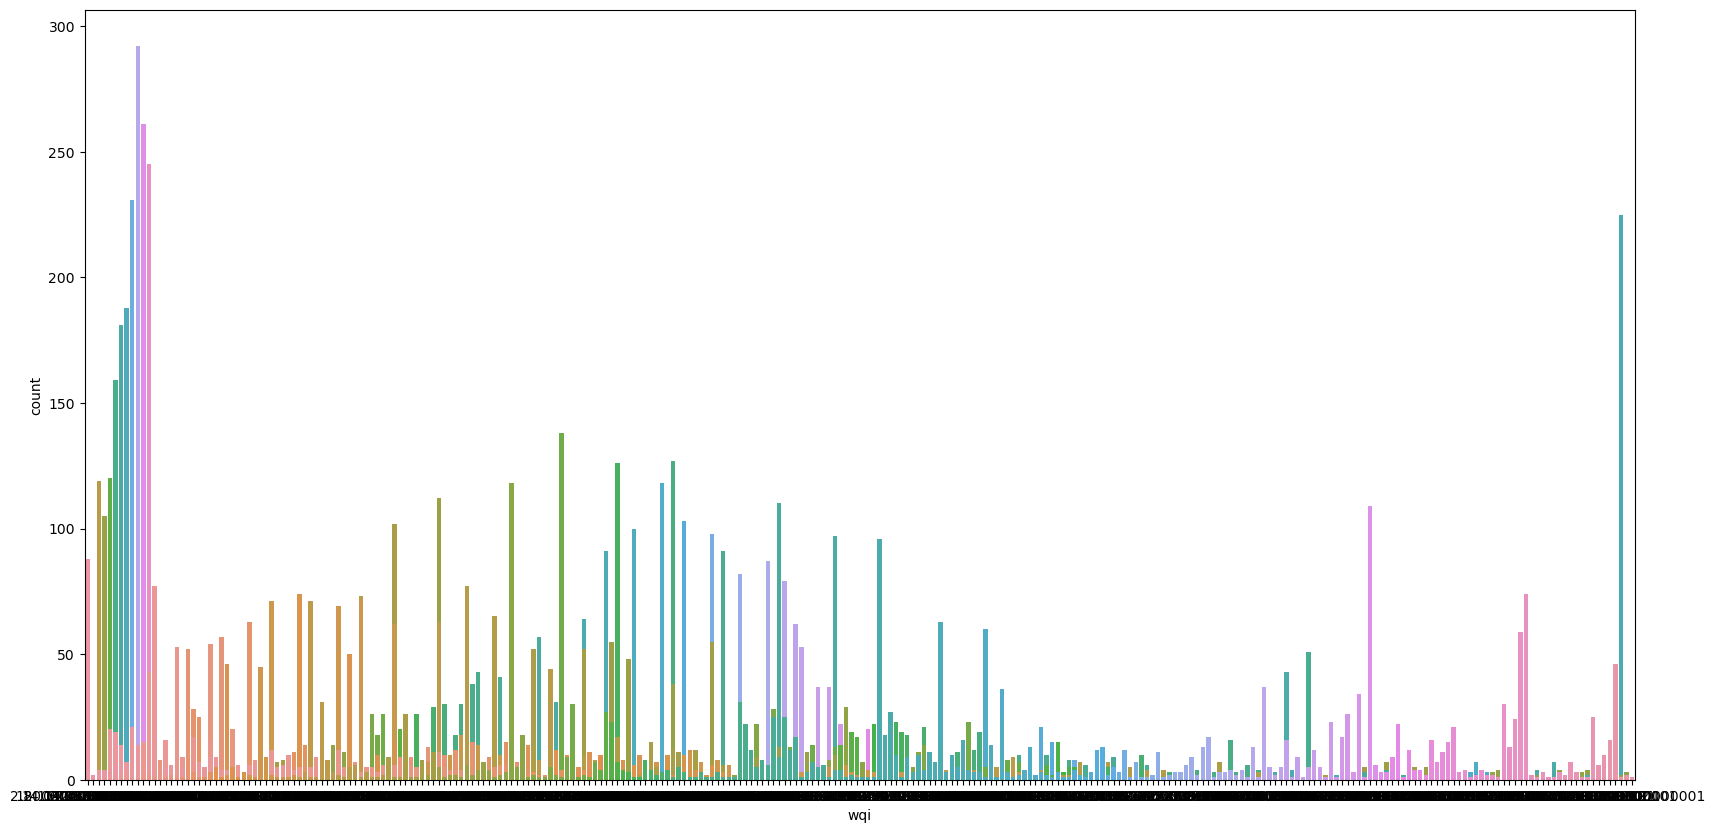

In [33]:
sns.countplot(data['year']) 
sns.countplot(data['do'])
sns.countplot(data['ph'])
sns.countplot(data['co'])
sns.countplot(data['bod'])
sns.countplot(data['na'])
sns.countplot(data['tc'])
sns.countplot(data['wqi'])

In [34]:
#Removing un necessary columns location state and the columnn created to calculate Water Quality Index
data.drop(['Temp','station','location','state','nbdo',"nec","nna","wph","wdo","wbdo","wec","wna","wco","npH","ndo","nco"],axis = 1,inplace=True)

In [35]:
data.head()

,do,ph,co,bod,na,tc,year,wqi
0,6.7,7.5,203.0,6.940049,0.1,27.0,2014,77.86
1,5.7,7.2,189.0,2.000000,0.2,8391.0,2014,60.46
2,6.3,6.9,179.0,1.700000,0.1,5330.0,2014,66.08
3,5.8,6.9,64.0,3.800000,0.5,8443.0,2014,56.14
4,5.8,7.3,83.0,1.900000,0.4,5500.0,2014,60.64


In [36]:
#Splitting the data into dependent and independent variables

In [37]:
x = data.iloc[:,0:7].values
y = data.iloc[:,7:].values

In [38]:
x

array([[6.70000000e+00, 7.50000000e+00, 2.03000000e+02, ...,
        1.00000000e-01, 2.70000000e+01, 2.01400000e+03],
       [5.70000000e+00, 7.20000000e+00, 1.89000000e+02, ...,
        2.00000000e-01, 8.39100000e+03, 2.01400000e+03],
       [6.30000000e+00, 6.90000000e+00, 1.79000000e+02, ...,
        1.00000000e-01, 5.33000000e+03, 2.01400000e+03],
       ...,
       [7.60000000e+00, 9.80000000e+01, 6.20000000e+00, ...,
        1.62307871e+00, 5.70000000e+02, 2.00300000e+03],
       [7.70000000e+00, 9.10000000e+01, 6.50000000e+00, ...,
        1.62307871e+00, 5.62000000e+02, 2.00300000e+03],
       [7.60000000e+00, 1.10000000e+02, 5.70000000e+00, ...,
        1.62307871e+00, 5.46000000e+02, 2.00300000e+03]])

In [39]:
x.shape

(1991, 7)

In [40]:
y.shape

(1991, 1)

In [41]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 10)

In [42]:
X_train.shape

(1592, 7)

In [43]:
X_test.shape

(399, 7)

In [44]:
y_train.shape

(1592, 1)

In [45]:
y_test.shape

(399, 1)

In [46]:
from sklearn.linear_model import LinearRegression
mlr = LinearRegression()
mlr.fit(X_train,y_train)

LinearRegression()

In [47]:
ypred = mlr.predict(X_test)

In [48]:
from sklearn.metrics import r2_score
accuracy = r2_score(ypred,y_test)

In [49]:
from sklearn.tree import DecisionTreeRegressor
dec_tree = DecisionTreeRegressor(random_state=0, max_depth=6)
dec_tree.fit(X_train, y_train)
y_predict = dec_tree.predict(X_test)
dec_tree_score = (dec_tree.score(X_test, y_test))
dec_tree_score*100

97.59816479570488

In [50]:
from sklearn.ensemble import RandomForestRegressor
reg_rf = RandomForestRegressor(n_estimators = 10 ,random_state = 0)
reg_rf.fit(X_train, y_train)
y_pred = reg_rf.predict(X_test)

C:\Users\mahar\AppData\Local\Temp\ipykernel_18404\2145497779.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  reg_rf.fit(X_train, y_train)


In [51]:
y_pred

array([20.304, 65.894, 93.838, 88.2  , 83.88 , 77.41 , 64.992, 82.76 ,
       17.16 , 88.02 , 88.2  , 82.94 , 88.38 , 82.94 , 66.44 , 83.046,
       21.428, 84.36 , 64.116, 56.216, 85.17 , 45.004, 65.54 , 82.58 ,
       85.26 , 16.56 , 73.764, 52.896, 75.448, 78.408, 66.246, 60.002,
       71.88 , 37.072, 81.906, 78.642, 87.66 , 87.804, 79.37 , 87.66 ,
       72.14 , 88.56 , 88.56 , 33.61 , 88.56 , 71.376, 53.13 , 71.646,
       66.44 , 28.08 , 53.116, 77.954, 39.32 , 79.64 , 59.92 , 70.804,
       82.04 , 87.804, 88.56 , 70.8  , 83.538, 60.82 , 88.56 , 27.334,
       39.32 , 81.15 , 65.936, 71.484, 82.94 , 66.48 , 93.28 , 93.604,
       83.52 , 81.168, 76.16 , 78.642, 66.44 , 84.87 , 82.58 , 72.806,
       83.682, 65.392, 71.16 , 71.16 , 88.56 , 79.224, 55.056, 80.4  ,
       94.18 , 62.052, 76.25 , 66.44 , 82.94 , 69.77 , 39.32 , 24.146,
       82.76 , 24.614, 82.76 , 66.966, 88.56 , 60.64 , 82.94 , 79.64 ,
       82.94 , 33.7  , 82.04 , 44.94 , 84.36 , 82.94 , 94.18 , 79.64 ,
      

In [52]:
reg_rf.score(X_train, y_train)

0.9979415720945234

In [53]:
reg_rf.score(X_test, y_test)

0.9915058686061382

In [54]:
y_test[10:15]

array([[88.2 ],
       [82.94],
       [88.38],
       [82.94],
       [66.44]])

In [55]:
y_pred[10:15]

array([88.2 , 82.94, 88.38, 82.94, 66.44])

C:\Users\mahar\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


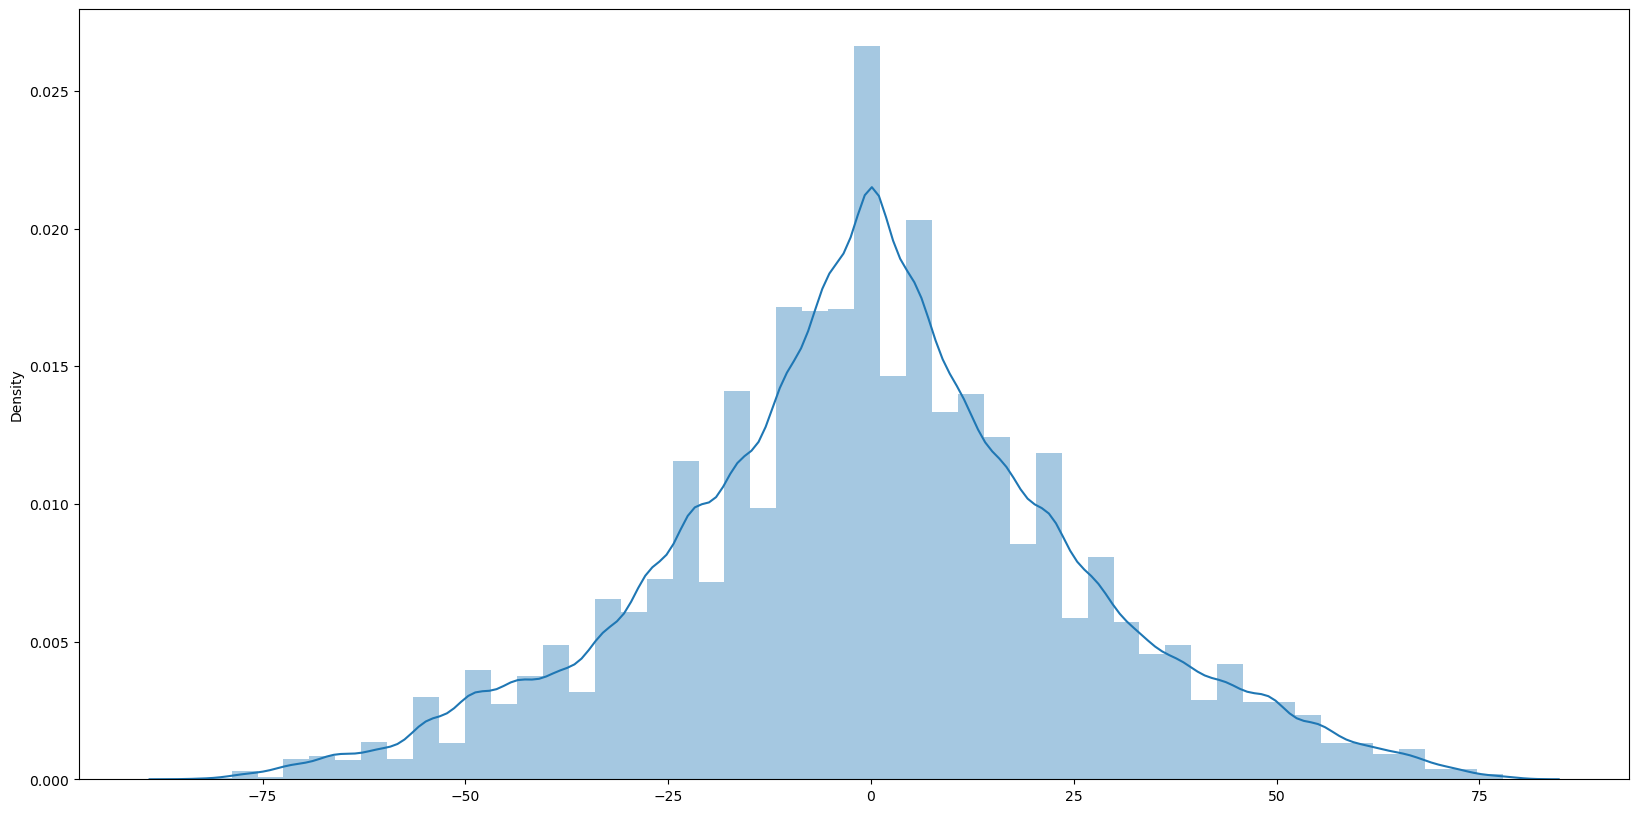

In [56]:
sns.distplot(y_test-y_pred)
plt.show()

In [57]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 0.6857593984962461
MSE: 2.7151162807017557
RMSE: 1.6477609901626376


In [58]:
metrics.r2_score(y_test, y_pred)

0.9915058686061382

In [59]:
import pickle
pickle.dump(reg_rf,open('wqi.pkl','wb'))
model = pickle.load(open('wqi.pkl','rb'))

In [61]:
!pip install ibm_watson_machine_learning

     ---------------------------------------- 1.8/1.8 MB 202.3 kB/s eta 0:00:00
     --------------------------------------- 53.3/53.3 kB 37.7 kB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ------------------------------------- 913.9/913.9 kB 70.0 kB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ------------------------------------- 135.6/135.6 kB 45.6 kB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for ibm-cos-sdk: filename=ibm_cos_sdk-2.11.0-py3-none-any.whl size=73641 sha256=1080869c7b4ea24ddf15abcaaceee4544dd0ee4e78e2e21f7d7c0c80aa131399
  Stored in directory: c:\users\mahar\appdata\local\pip\cache\wheels\d3\a5\34\52d2e378d3d0446989ebcd214af8bad55beecf905258852b9f
  Created wheel for ibm-cos-sdk-core: filename=ibm_cos_sdk_core-2.11.0-py3-none-any.

In [62]:
from ibm_watson_machine_learning import APIClient
import json
import numpy as np

In [63]:
wml_credentials = {
    "url":"https://us-south.ml.cloud.ibm.com",
    "apikey":"QsRmQ8b_1_nqvAY9fH8OQOOYGqzQIQbGRCnP1mJWt-zU"
}

In [64]:
wml_client = APIClient(wml_credentials)
wml_client.spaces.list()

Note: 'limit' is not provided. Only first 50 records will be displayed if the number of records exceed 50
------------------------------------  -----  ------------------------
ID                                    NAME   CREATED
bb8d9138-cdc5-4013-8cdf-869abc65fb59  MODEL  2022-12-03T06:06:17.626Z
------------------------------------  -----  ------------------------


In [66]:
SPACE_ID="bb8d9138-cdc5-4013-8cdf-869abc65fb59"

In [68]:
wml_client.set.default_space(SPACE_ID)

'SUCCESS'

In [70]:
wml_client.software_specifications.list()

-----------------------------  ------------------------------------  ----
NAME                           ASSET_ID                              TYPE
default_py3.6                  0062b8c9-8b7d-44a0-a9b9-46c416adcbd9  base
kernel-spark3.2-scala2.12      020d69ce-7ac1-5e68-ac1a-31189867356a  base
pytorch-onnx_1.3-py3.7-edt     069ea134-3346-5748-b513-49120e15d288  base
scikit-learn_0.20-py3.6        09c5a1d0-9c1e-4473-a344-eb7b665ff687  base
spark-mllib_3.0-scala_2.12     09f4cff0-90a7-5899-b9ed-1ef348aebdee  base
pytorch-onnx_rt22.1-py3.9      0b848dd4-e681-5599-be41-b5f6fccc6471  base
ai-function_0.1-py3.6          0cdb0f1e-5376-4f4d-92dd-da3b69aa9bda  base
shiny-r3.6                     0e6e79df-875e-4f24-8ae9-62dcc2148306  base
tensorflow_2.4-py3.7-horovod   1092590a-307d-563d-9b62-4eb7d64b3f22  base
pytorch_1.1-py3.6              10ac12d6-6b30-4ccd-8392-3e922c096a92  base
tensorflow_1.15-py3.6-ddl      111e41b3-de2d-5422-a4d6-bf776828c4b7  base
autoai-kb_rt22.2-py3.10        125b6d9

In [72]:
software_spec_uid=wml_client.software_specifications.get_uid_by_name("runtime-22.1-py3.9")
software_spec_uid

'12b83a17-24d8-5082-900f-0ab31fbfd3cb'

In [73]:
model_details=wml_client.repository.store_model(model=reg_rf,meta_props={
    wml_client.repository.ModelMetaNames.NAME:"Water_quality_modeling",
    wml_client.repository.ModelMetaNames.TYPE:"scikit-learn_1.0",
    wml_client.repository.ModelMetaNames.SOFTWARE_SPEC_UID:software_spec_uid
})
model_id=wml_client.repository.get_model_id(model_details)

In [74]:
model_id

'3d92b332-aa6a-4e01-a8af-22f6a325ab9b'

In [76]:
X_train[0]

array([5.500e+00, 7.400e+00, 6.350e+02, 8.800e+00, 5.080e+00, 5.500e+03,
       2.012e+03])

In [78]:
reg_rf.predict([[5.500e+00, 7.400e+00, 6.350e+02, 8.800e+00, 5.080e+00, 5.500e+03,
       2.012e+03]])

array([50.56])